In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import category_encoders as ce
from sklearn.tree import DecisionTreeRegressor, plot_tree
df = pd.read_csv(r"C:\Users\nicholas.assad\dat-11-15_old\Homework\Unit2\data\insurance_premiums.csv")
import matplotlib.pyplot as plt

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
## Data Visualization

In [4]:
sdf = df.groupby('sex').mean()

In [5]:
sdf

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [6]:
sdf_new=sdf.reset_index()

<BarContainer object of 2 artists>

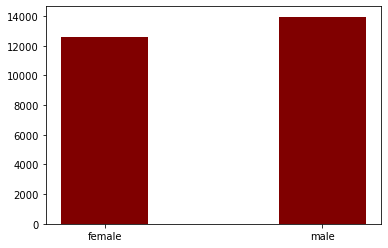

In [7]:
plt.bar(sdf_new['sex'],sdf_new['charges'], color ='maroon',
        width = .4)

In [8]:
## Shows the average premium charges for a male v. female

In [9]:
adf = df.groupby('age').mean()

In [10]:
adf.head()

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802


In [11]:
adf_new=adf.reset_index()

array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

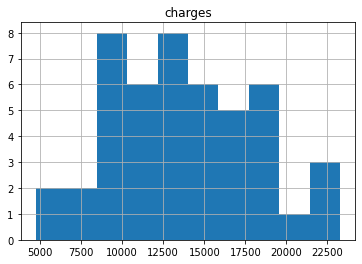

In [12]:
adf_new.hist('charges',bins=10)

<BarContainer object of 47 artists>

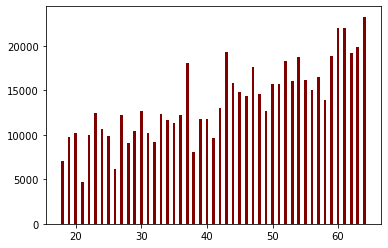

In [13]:
plt.bar(adf_new['age'],adf_new['charges'], color ='maroon',
        width = .4)

In [14]:
## Visualization indicates that premium charges increase with age, although there are interesting decreases in premium charges around the ages of 40 and 55

Text(0, 0.5, 'Count')

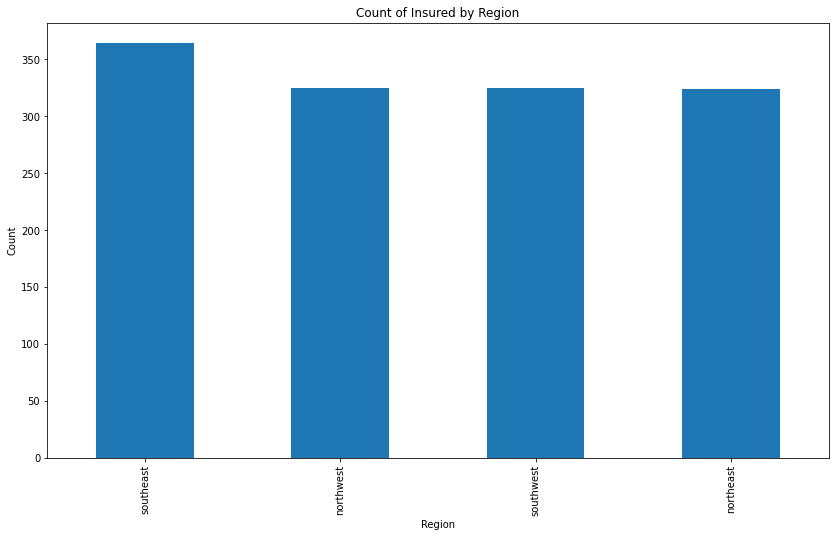

In [15]:
chart = df['region'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Insured by Region")
chart.set_xlabel("Region")
chart.set_ylabel("Count")

In [16]:
## There is a similar volume of customers insured in each region with the greatest volume of insured in the Southeast. Going to take a look at how the BMI and Insurance Charges vary by region.

In [17]:
df.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [18]:
rdf = df.groupby('region').mean()

In [19]:
rdf_new=rdf.reset_index()

<BarContainer object of 4 artists>

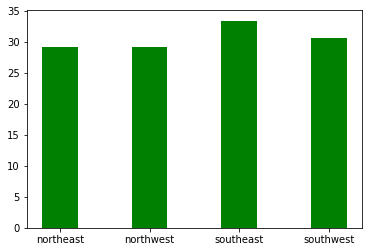

In [20]:
plt.bar(rdf_new['region'],rdf_new['bmi'], color ='green',
        width = .4)

In [18]:
## Shows average BMI by region - looks like the Southeast has the greatest BMI on average

<BarContainer object of 4 artists>

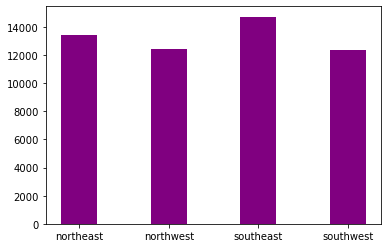

In [21]:
plt.bar(rdf_new['region'],rdf_new['charges'], color ='purple',
        width = .4)

In [22]:
## BMI and Insurance Charges vary by region. It seems that in the Southeast higher BMI corresponds with greater Insurance Charges
## In the Northwest, lower BMI corresponds with lower Insurance Charges

{'whiskers': [<matplotlib.lines.Line2D at 0x2371d4f5a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2371d505190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2371d4f5730>],
 'medians': [<matplotlib.lines.Line2D at 0x2371d505850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2371d505bb0>],
 'means': []}

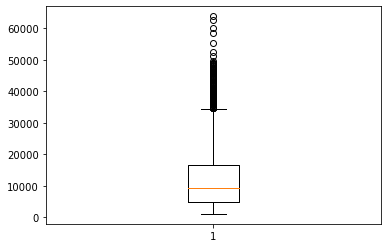

In [23]:
plt.boxplot(df['charges'])

In [24]:
## Based on the boxplot above it seems that the median Insurance Charge for a given customer is around $1000. Going to see if this varies by either # of children or whether or not the Insured smokes.

In [25]:
import seaborn as sns

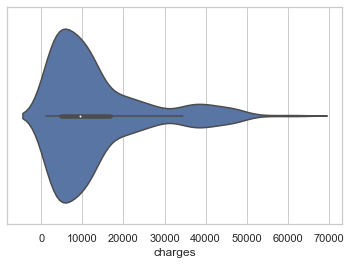

In [26]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df["charges"])

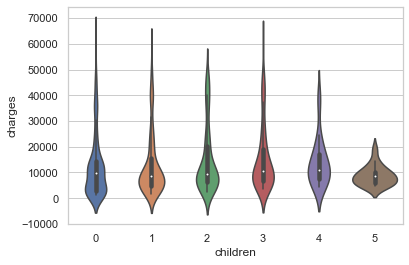

In [27]:
ax = sns.violinplot(x="children", y="charges", data=df)

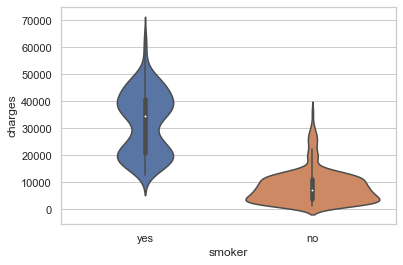

In [28]:
ax = sns.violinplot(x="smoker", y="charges", data=df)

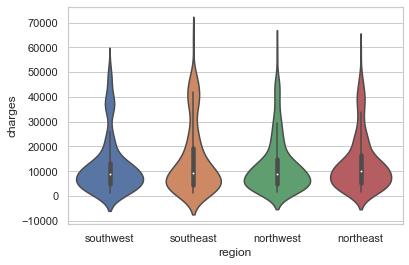

In [29]:
ax = sns.violinplot(x="region", y="charges", data=df)

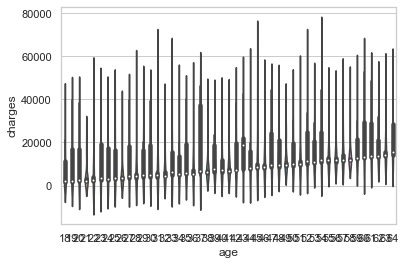

In [30]:
ax = sns.violinplot(x="age", y="charges", data=df, gridsize=300, width=0.4)

In [31]:
## Some general observations based on the violin plots above:
## Insurance charges increase based on the number of children up to 4 children, then decrease at 5 children
## Smoking has a great effect on insurance charges; median charges for smokers is about $27,000 more than non-smokers
## The range of charges is also signigicantly greater for smokers than non-smokers. Non-smokers have a much lower ceiling, whereas smokers might pay up to $70,000
## Charges do not vary much by region
## Charges increase by age

In [32]:
df.groupby('smoker').median()

,age,bmi,children,charges
smoker,,,,
no,40,30.3525,1,7345.40530
yes,38,30.4475,1,34456.34845


In [33]:
df.groupby(['children','smoker'])['charges'].mean()

children  smoker
0         no         7611.793335
          yes       31341.363954
1         no         8303.109350
          yes       31822.654334
2         no         9493.093674
          yes       33844.235755
3         no         9614.519391
          yes       32724.915268
4         no        12121.344408
          yes       26532.276933
5         no         8183.845556
          yes       19023.260000
Name: charges, dtype: float64

In [34]:
scdf=df.groupby(['children','smoker'])['charges'].mean()

In [35]:
scdf_new=scdf.reset_index()

In [36]:
scdf

children  smoker
0         no         7611.793335
          yes       31341.363954
1         no         8303.109350
          yes       31822.654334
2         no         9493.093674
          yes       33844.235755
3         no         9614.519391
          yes       32724.915268
4         no        12121.344408
          yes       26532.276933
5         no         8183.845556
          yes       19023.260000
Name: charges, dtype: float64

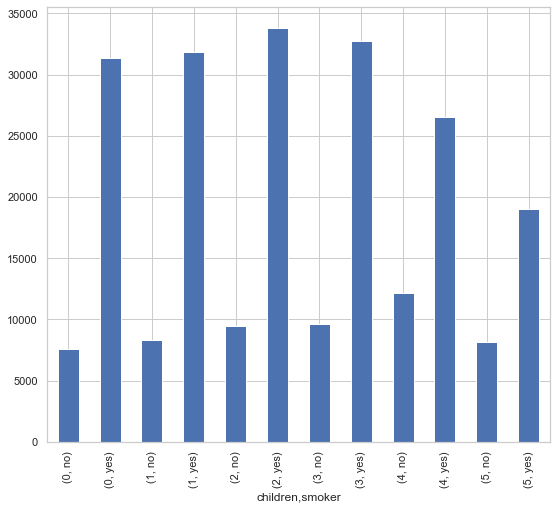

In [37]:
scdf.plot(x="Children / Smoker", y=["children", "smoker"], kind="bar",figsize=(9,8))
plt.show()

In [38]:
## Clearly indicates that smoker have higher premium charges regardless of how many children they have
## Seems that premium charges decline once the # of children exceed 2

In [39]:
## Would like to understand the relationship between BMI, Smoking Indicator and premium charges incurred by customers

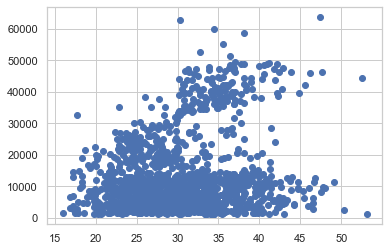

In [40]:
plt.scatter(df['bmi'], df['charges'])
plt.show()

In [41]:
list1 = df['bmi']
list2 = df['charges']

In [11]:
from scipy.stats import pearsonr

In [12]:
## Initially wanted to look at correlation coefficients to see which factors were most closely correlated with insurance premium charges

In [13]:
df.corr(method='spearman')[['charges']].sort_values(by = 'charges')

,charges
bmi,0.119396
children,0.133339
age,0.534392
charges,1.000000


In [14]:
## We can see that of the other numerical variables, age is most closely correlated to charges when looking solely at the Pearson Correlation

In [15]:
df.corr(method='spearman')

,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


In [43]:
cc12 = pearsonr(list1,list2)

In [44]:
cc12

(0.19834096883362887, 2.459085535117846e-13)

In [45]:
df[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [46]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [47]:
import seaborn as sns

<AxesSubplot:>

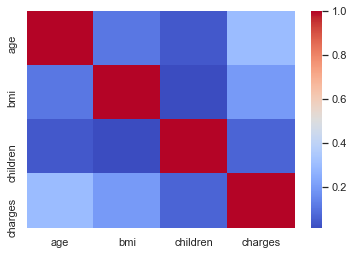

In [48]:
sns.heatmap(df.corr(),cmap="coolwarm")

In [49]:
## Seems that that there is a .198 Pearson Correlation coefficient between BMI and Premium Charges

In [52]:
ore = ce.OrdinalEncoder()
ore.fit_transform(df)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,2,30.970,3,2,3,10600.54830
1334,18,1,31.920,0,2,4,2205.98080
1335,18,1,36.850,0,2,2,1629.83350
1336,21,1,25.800,0,2,1,2007.94500


In [54]:
new_df=ore.fit_transform(df)

In [55]:
new_df['charges2']=df['charges']

In [56]:
new_df

,age,sex,bmi,children,smoker,region,charges,charges2
0,19,1,27.900,0,1,1,16884.92400,16884.92400
1,18,2,33.770,1,2,2,1725.55230,1725.55230
2,28,2,33.000,3,2,2,4449.46200,4449.46200
3,33,2,22.705,0,2,3,21984.47061,21984.47061
4,32,2,28.880,0,2,3,3866.85520,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,2,30.970,3,2,3,10600.54830,10600.54830
1334,18,1,31.920,0,2,4,2205.98080,2205.98080
1335,18,1,36.850,0,2,2,1629.83350,1629.83350
1336,21,1,25.800,0,2,1,2007.94500,2007.94500


In [ ]:
## Was looking to find the correlation coefficient between these different variables. Later realized that there's a much easier way to do this via the matrix.

In [57]:
list3 = new_df['smoker']
list4 = new_df['bmi']
list5 = new_df['charges2']

In [58]:
cc34 = pearsonr(list3,list4)

In [59]:
cc34

(-0.0037504259049803666, 0.890985028001716)

In [60]:
cc35 = pearsonr(list3,list5)

In [61]:
cc35

(-0.7872514304984773, 8.27143584217778e-283)

In [62]:
df.groupby(['smoker']).mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [63]:
## It seems that whether the customer is a smoker does not have an effect on age, bmi or the number of children; however, it clearly has an impact the premium charges incurred

In [64]:
## Going to take a look at the correlation coefficient matrix on the new_df defined using the ordinal encoders

<AxesSubplot:>

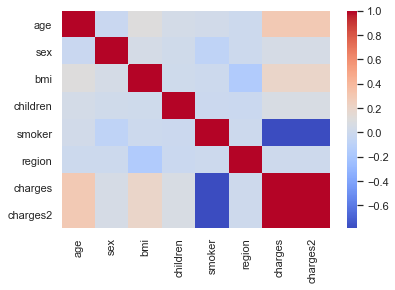

In [65]:
sns.heatmap(new_df.corr(),cmap="coolwarm")

In [66]:
## Based on this heatmap it is clear that the variable most closely correlated with the charges incurred by customers is "smoker"

In [67]:
## Start putting together decision tree model to predict the Insurance Charges

In [16]:
import plotly.express as px
import plotly.offline as off
pd.options.plotting.backend = "plotly"

ModuleNotFoundError: No module named 'plotly'

In [17]:
## Not sure why I am unable to install plotly here. I was looking to create some additional visuals from this library similar to what was shown in the demo.

<AxesSubplot:title={'center':'Age By Sex'}, xlabel='sex'>

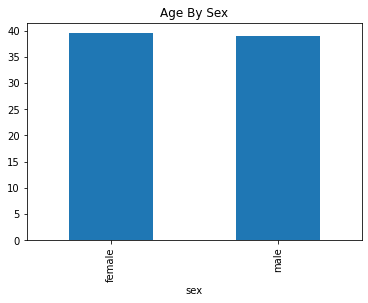

In [19]:
# Age by Sex
df.groupby('sex')['age'].mean().plot(kind = 'bar', title = 'Age By Sex')

<AxesSubplot:title={'center':'BMI By Sex'}, xlabel='sex'>

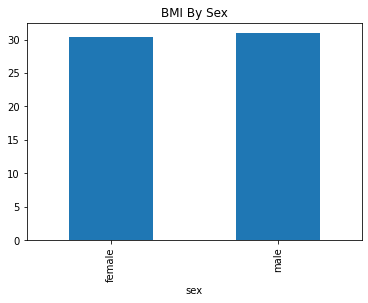

In [21]:
# BMI by Sex
df.groupby('sex')['bmi'].mean().plot(kind = 'bar', title = 'BMI By Sex')

In [22]:
## Going to start my model creation

In [68]:
X=df.drop('charges', axis=1)
y=df['charges']

In [69]:
! pip install category_encoders

In [70]:
ore = ce.OrdinalEncoder()

In [71]:
ore.fit_transform(X)

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,2,33.770,1,2,2
2,28,2,33.000,3,2,2
3,33,2,22.705,0,2,3
4,32,2,28.880,0,2,3
...,...,...,...,...,...,...
1333,50,2,30.970,3,2,3
1334,18,1,31.920,0,2,4
1335,18,1,36.850,0,2,2
1336,21,1,25.800,0,2,1


In [72]:
ore.mapping

[{'col': 'sex',
  'mapping': female    1
  male      2
  NaN      -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'smoker',
  'mapping': yes    1
  no     2
  NaN   -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'region',
  'mapping': southwest    1
  southeast    2
  northwest    3
  northeast    4
  NaN         -2
  dtype: int64,
  'data_type': dtype('O')}]

In [73]:
ohe = ce.OneHotEncoder(use_cat_names = True)

In [74]:
ohe.fit_transform(X['sex'])

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [76]:
te = ce.TargetEncoder()

In [77]:
te.fit_transform(X, y)

,age,sex,bmi,children,smoker,region
0,19,12569.578844,27.900,0,32050.231832,12346.937377
1,18,13956.751178,33.770,1,8434.268298,14735.411438
2,28,13956.751178,33.000,3,8434.268298,14735.411438
3,33,13956.751178,22.705,0,8434.268298,12417.575374
4,32,13956.751178,28.880,0,8434.268298,12417.575374
...,...,...,...,...,...,...
1333,50,13956.751178,30.970,3,8434.268298,12417.575374
1334,18,12569.578844,31.920,0,8434.268298,13406.384516
1335,18,12569.578844,36.850,0,8434.268298,14735.411438
1336,21,12569.578844,25.800,0,8434.268298,12346.937377


In [78]:
ore=ce.OrdinalEncoder()
X1=ore.fit_transform(X)

In [79]:
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X1, y)
tree.score(X1, y)

0.880563608127793

In [80]:
ohe = ce.OneHotEncoder()
X2  = ohe.fit_transform(X)
tree.fit(X2, y)
tree.score(X2, y)

0.8804085781738352

In [81]:
te = ce.TargetEncoder()
X3  = te.fit_transform(X, y)
tree.fit(X3, y)
tree.score(X3, y)

0.879488274193142

In [82]:
## With a decision tree depth of 5, Ordinal Encoding seems to have the greatest predictive power. Going to see if increasing the depth to 9 changes this

In [83]:
tree = DecisionTreeRegressor(max_depth = 9)
tree.fit(X1, y)
tree.score(X1, y)

0.9510843878081224

In [84]:
ohe = ce.OneHotEncoder()
X2  = ohe.fit_transform(X)
tree.fit(X2, y)
tree.score(X2, y)

0.9523045204278374

In [85]:
te = ce.TargetEncoder()
X3  = te.fit_transform(X, y)
tree.fit(X3, y)
tree.score(X3, y)

0.9473325548734831

In [86]:
## Changing the depth to 9 increases the predictive power of all models, but the One Hot Encoder has the greatest score

In [87]:
## Going to take a look at the importance of the features

In [88]:
feats = pd.DataFrame({
    'Columns': X3.columns,
    'Importance': tree.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

feats

,Columns,Importance
4,smoker,0.654221
2,bmi,0.194370
0,age,0.117712
3,children,0.016776
5,region,0.012198
1,sex,0.004722


In [89]:
## The smoking binary variable and the BMI of the insured are able to describe approximately 85% of the variability when predicting the Insurance charges the customer has paid

In [90]:
## Going to visualize the tree but only with a depth of 4 so that we can interpret how the model made splits and decisions

In [91]:
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X1, y)
tree.score(X1, y)

0.880563608127793

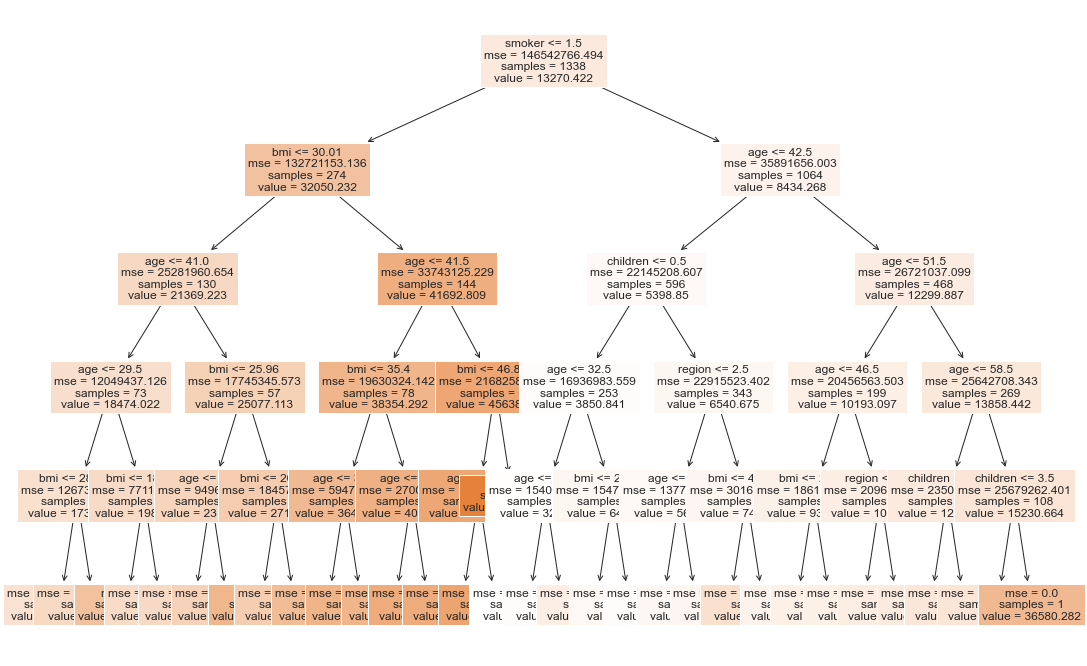

In [92]:
plt.figure(figsize = (18, 12))

plot_tree(tree, fontsize = 12, filled = True, feature_names = X1.columns);

In [93]:
## The MSE errors in this decision tree are extremely high; however, by splitting using the variable 'smoker' immediately the MSE decreases on both sides as we'd expect

In [94]:
X_new=df.drop(['charges','age','sex','children','region'], axis=1)
y_new=df['charges']

In [95]:
te = ce.TargetEncoder()
te.fit_transform(X_new, y_new)

,bmi,smoker
0,27.900,32050.231832
1,33.770,8434.268298
2,33.000,8434.268298
3,22.705,8434.268298
4,28.880,8434.268298
...,...,...
1333,30.970,8434.268298
1334,31.920,8434.268298
1335,36.850,8434.268298
1336,25.800,8434.268298


In [96]:
X4 = te.fit_transform(X_new, y_new)

In [97]:
tree.fit(X4, y)
tree.score(X4, y)

0.7857845629429416

In [98]:
## When the variables ages, sex, region and children were removed the model score became worse (via the target encoding method) 

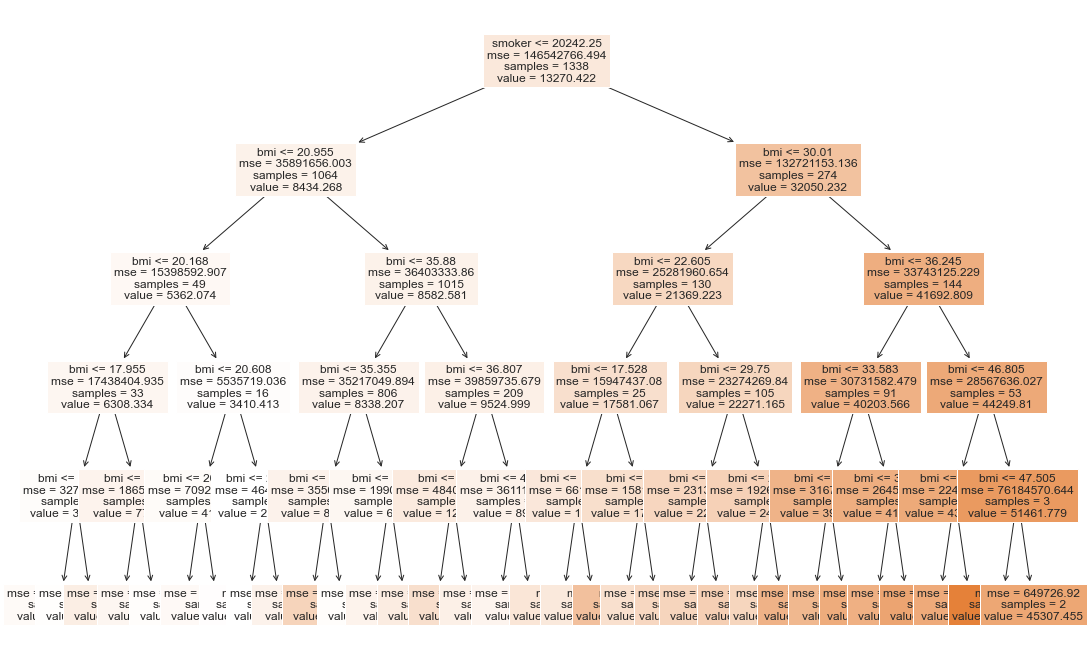

In [99]:
plt.figure(figsize = (18, 12))

plot_tree(tree, fontsize = 12, filled = True, feature_names = X4.columns);

In [100]:
feats = pd.DataFrame({
    'Columns': X4.columns,
    'Importance': tree.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

feats

,Columns,Importance
1,smoker,0.788721
0,bmi,0.211279


In [40]:
## It's clear that bmi and smoker had the largest impact on the prediction of the insurance charges
## I wanted to create a model solely with smoker and bmi to see how the score might adjust
## The initial split of the decision tree always seems to start with smoker, which indicates that this variable has the largest impact
## The next split was typically made off bmi and age, until age was removed

In [101]:
X_new2=df.drop(['charges','sex','children','region'], axis=1)
y_new2=df['charges']

In [102]:
ore=ce.OrdinalEncoder()
X5=ore.fit_transform(X_new2)

In [103]:
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X5, y)
tree.score(X5, y)

0.8758387998037616

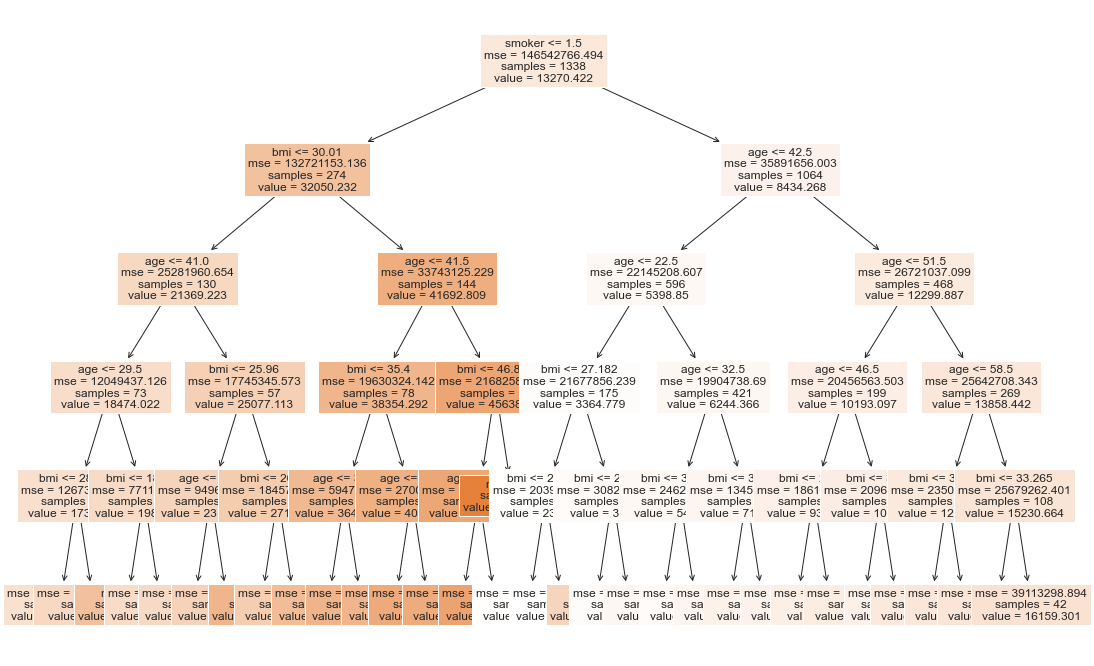

In [104]:
plt.figure(figsize = (18, 12))

plot_tree(tree, fontsize = 12, filled = True, feature_names = X5.columns);

In [105]:
feats = pd.DataFrame({
    'Columns': X5.columns,
    'Importance': tree.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

feats

,Columns,Importance
2,smoker,0.707624
1,bmi,0.176701
0,age,0.115674


In [107]:
## When only smoker, bmi, and age were the remaining variables included in the model 'smoker' accounted for more than 70% of the variability within 'charges'.

In [108]:
## Going to move forward with the model that I created that had the highest score

In [109]:
tree2 = DecisionTreeRegressor(max_depth = 9)
ohe = ce.OneHotEncoder()
X2  = ohe.fit_transform(X)
tree2.fit(X2, y)
tree2.score(X2, y)

0.9523045204278374

In [110]:
feats = pd.DataFrame({
    'Columns': X2.columns,
    'Importance': tree2.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

feats

,Columns,Importance
6,smoker_2,0.650805
3,bmi,0.191850
0,age,0.121772
4,children,0.017691
9,region_3,0.005365
10,region_4,0.003978
8,region_2,0.003044
7,region_1,0.002831
1,sex_1,0.002084
2,sex_2,0.000580


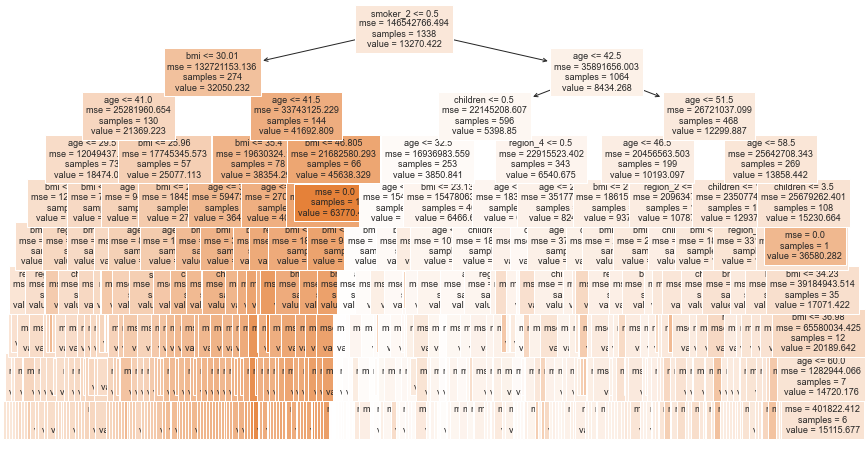

In [111]:
plt.figure(figsize = (14, 8))

plot_tree(tree2, fontsize = 9, filled = True, feature_names = X2.columns);

In [112]:
## Going to create a pipeline

In [114]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

In [115]:
tree2 = DecisionTreeRegressor(max_depth = 9)
pipe = make_pipeline(ohe, tree2)

In [116]:
pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex', 'smoker', 'region'])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=9))])

In [117]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [118]:
pipe.fit(X,y)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['sex', 'smoker', 'region'])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=9))])

In [119]:
pipe.score(X, y)

0.9523045204278374

In [120]:
pipe.predict(X)

array([17113.171165  ,  1764.4698875 ,  5426.25269091, ...,
        2718.4132998 ,  2098.65527143, 29162.92843   ])

In [121]:
df = df.sample(frac = 1)

In [122]:
df

,age,sex,bmi,children,smoker,region,charges
1001,24,male,32.700,0,yes,southwest,34472.84100
254,50,male,31.825,0,yes,northeast,41097.16175
4,32,male,28.880,0,no,northwest,3866.85520
865,40,male,29.900,2,no,southwest,6600.36100
317,54,male,32.775,0,no,northeast,10435.06525
...,...,...,...,...,...,...,...
882,21,female,22.135,0,no,northeast,2585.85065
206,59,male,26.400,0,no,southeast,11743.29900
446,60,male,29.640,0,no,northeast,12730.99960
1295,20,male,22.000,1,no,southwest,1964.78000


In [212]:
train=df.groupby('region').apply(lambda x: x.iloc[:-60])
test=df.groupby('region').apply(lambda x: x.iloc[-60:])

In [213]:
train

age     sex     bmi  children smoker     region      charges
region                                                                      
northeast 282    30    male  27.645         1     no  northeast   4237.12655
          685    53    male  26.410         2     no  northeast  11244.37690
          333    56  female  28.785         0     no  northeast  11658.37915
          1276   22  female  30.400         0     no  northeast   2741.94800
          384    44    male  22.135         2     no  northeast   8302.53565
...             ...     ...     ...       ...    ...        ...          ...
southwest 21     30  female  32.400         1     no  southwest   4149.73600
          214    45  female  30.900         2     no  southwest   8520.02600
          1199   31  female  25.800         2     no  southwest   4934.70500
          1255   42  female  37.900         0     no  southwest   6474.01300
          494    21    male  25.700         4    yes  southwest  17942.10600

[1098 rows x 7 columns]

In [214]:
test

age     sex     bmi  children smoker     region      charges
region                                                                      
northeast 16     52  female  30.780         1     no  northeast  10797.33620
          228    41  female  31.635         1     no  northeast   7358.17565
          172    18    male  15.960         0     no  northeast   1694.79640
          31     18  female  26.315         0     no  northeast   2198.18985
          485    31  female  31.065         0     no  northeast   4347.02335
...             ...     ...     ...       ...    ...        ...          ...
southwest 1263   43  female  29.900         1     no  southwest   7337.74800
          400    51  female  20.600         0     no  southwest   9264.79700
          500    29    male  34.400         0    yes  southwest  36197.69900
          407    47  female  23.600         1     no  southwest   8539.67100
          45     55    male  37.300         0     no  southwest  20630.28351

[240 rows x 7 columns]

In [157]:
X_train=train.drop('charges', axis=1)
y_train=train['charges']

X_test=train.drop('charges', axis=1)
y_test=train['charges']

In [158]:
pipe=make_pipeline(ce.TargetEncoder(), DecisionTreeRegressor(max_depth=6))

pipe.fit(X_train, y_train).score(X_test, y_test)

0.9003951084333885

In [159]:
pipe=make_pipeline(ce.OneHotEncoder(), DecisionTreeRegressor(max_depth=6))

pipe.fit(X_train, y_train).score(X_test, y_test)

0.9033135690075158

In [160]:
pipe.score(X_train, y_train)

0.9033135690075158

In [195]:
## One Hot Encoder with model variation and paramter maximization

In [172]:
tree = DecisionTreeRegressor(max_depth = 6)
pipe = make_pipeline(ce.OneHotEncoder(), tree)

# function to automatically check for validation score -- useful for 
def get_val_scores(df, estimator):
    
    df
    
    # create training and validation set
    train = df.groupby('region').apply(lambda x: x.iloc[:-60]).reset_index(drop = True)
    val   = df.groupby('region').apply(lambda x: x.iloc[-60:]).reset_index(drop = True)
    
    # create a validation & test set
    X_train, y_train = train.drop('charges', axis = 1), train['charges']
    X_val, y_val     = val.drop('charges', axis = 1), val['charges']
    
    estimator.fit(X_train, y_train)
    
    # score on the test data
    return estimator.score(X_val, y_val)

# Load in the data set
df = pd.read_csv(r"C:\Users\nicholas.assad\dat-11-15_old\Homework\Unit2\data\insurance_premiums.csv")

df = df.sample(frac = 1)

# fill in missing values
df = df.fillna(0)

In [173]:
train = df.groupby('region').apply(lambda x: x.iloc[:-60]).reset_index(drop = True)
test  = df.groupby('region').apply(lambda x: x.iloc[-60:]).reset_index(drop = True)

In [174]:
val_score = get_val_scores(train, pipe)

In [175]:
get_val_scores(train, pipe)

0.8092360348611343

In [ ]:
## Going to attempt to use different model parameters

In [181]:
min_samples_leaf = [10, 20, 30, 40]
max_features     = [0.6, 0.8, 1.0]
max_depth        = [7, 8, 9, 10, 11]
cv_scores        = []

In [178]:
## Creating training loop similar to what we used in class

In [182]:
for sample in min_samples_leaf:
    for feature in max_features:
        for depth in max_depth:
            print(f"Fitting a tree for leaf size: {sample}, max feats: {feature}, depth: {depth}")
            pipe[-1].set_params(min_samples_leaf = sample, max_depth = depth, max_features = feature)
            val_score = get_val_scores(train, pipe)
            cv_scores.append((val_score, sample, feature, depth))

Fitting a tree for leaf size: 10, max feats: 0.6, depth: 7
Fitting a tree for leaf size: 10, max feats: 0.6, depth: 8
Fitting a tree for leaf size: 10, max feats: 0.6, depth: 9
Fitting a tree for leaf size: 10, max feats: 0.6, depth: 10
Fitting a tree for leaf size: 10, max feats: 0.6, depth: 11
Fitting a tree for leaf size: 10, max feats: 0.8, depth: 7
Fitting a tree for leaf size: 10, max feats: 0.8, depth: 8
Fitting a tree for leaf size: 10, max feats: 0.8, depth: 9
Fitting a tree for leaf size: 10, max feats: 0.8, depth: 10
Fitting a tree for leaf size: 10, max feats: 0.8, depth: 11
Fitting a tree for leaf size: 10, max feats: 1.0, depth: 7
Fitting a tree for leaf size: 10, max feats: 1.0, depth: 8
Fitting a tree for leaf size: 10, max feats: 1.0, depth: 9
Fitting a tree for leaf size: 10, max feats: 1.0, depth: 10
Fitting a tree for leaf size: 10, max feats: 1.0, depth: 11
Fitting a tree for leaf size: 20, max feats: 0.6, depth: 7
Fitting a tree for leaf size: 20, max feats: 0.6, 

In [183]:
cv_scores

[(0.8265484279956734, 10, 0.6, 7),
 (0.7586296413568212, 10, 0.6, 8),
 (0.8169376116065395, 10, 0.6, 9),
 (0.8318450855110704, 10, 0.6, 10),
 (0.7598124746586746, 10, 0.6, 11),
 (0.8416134372904316, 10, 0.8, 7),
 (0.8261138279822169, 10, 0.8, 8),
 (0.7874890675134236, 10, 0.8, 9),
 (0.8288749299828861, 10, 0.8, 10),
 (0.8272029341852373, 10, 0.8, 11),
 (0.8345578046059192, 10, 1.0, 7),
 (0.8291680645802115, 10, 1.0, 8),
 (0.8274573918874113, 10, 1.0, 9),
 (0.8270172817021286, 10, 1.0, 10),
 (0.82656932450983, 10, 1.0, 11),
 (0.7578907086067636, 20, 0.6, 7),
 (0.8319818579730034, 20, 0.6, 8),
 (0.8370784619454207, 20, 0.6, 9),
 (0.8354174553878703, 20, 0.6, 10),
 (0.8283197887096962, 20, 0.6, 11),
 (0.8334940806535813, 20, 0.8, 7),
 (0.83886268696068, 20, 0.8, 8),
 (0.8290141562587952, 20, 0.8, 9),
 (0.8366796946125652, 20, 0.8, 10),
 (0.8398688280816854, 20, 0.8, 11),
 (0.8364689067509815, 20, 1.0, 7),
 (0.8367189125003948, 20, 1.0, 8),
 (0.8363118199562354, 20, 1.0, 9),
 (0.8363118199

In [ ]:
## Parameters for the best model

In [233]:
max(cv_scores)

(0.8464062645466374, 10, 0.8, 5)

In [186]:
## Setting model parameters to match the optimal selection

In [185]:
pipe[-1].set_params(min_samples_leaf = 10, max_features = 0.8, max_depth = 7)

DecisionTreeRegressor(max_depth=7, max_features=0.8, min_samples_leaf=10)

In [187]:
## Fit on all of training data

In [188]:
X_train, y_train = train.drop(['charges'], axis = 1), train['charges']
X_test, y_test   = test.drop(['charges'], axis = 1), test['charges']

In [189]:
## Score model on train and test set

In [190]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8662103784683967

In [196]:
## Going to use the target encoder method and change the size of the test and training set slightly

In [219]:
tree = DecisionTreeRegressor(max_depth = 6)
pipe = make_pipeline(ce.TargetEncoder(), tree)

# function to automatically check for validation score -- useful for 
def get_val_scores(df, estimator):
    
    df
    
    # create training and validation set
    train = df.groupby('region').apply(lambda x: x.iloc[:-70]).reset_index(drop = True)
    val   = df.groupby('region').apply(lambda x: x.iloc[-70:]).reset_index(drop = True)
    
    # create a validation & test set
    X_train, y_train = train.drop('charges', axis = 1), train['charges']
    X_val, y_val     = val.drop('charges', axis = 1), val['charges']
    
    estimator.fit(X_train, y_train)
    
    # score on the test data
    return estimator.score(X_val, y_val)

# Load in the data set
df = pd.read_csv(r"C:\Users\nicholas.assad\dat-11-15_old\Homework\Unit2\data\insurance_premiums.csv")

df = df.sample(frac = 1)

# fill in missing values
df = df.fillna(0)

In [220]:
train = df.groupby('region').apply(lambda x: x.iloc[:-70]).reset_index(drop = True)
test  = df.groupby('region').apply(lambda x: x.iloc[-70:]).reset_index(drop = True)

In [221]:
train

,age,sex,bmi,children,smoker,region,charges
0,63,female,27.740,0,yes,northeast,29523.16560
1,41,male,29.640,5,no,northeast,9222.40260
2,25,female,23.465,0,no,northeast,3206.49135
3,35,male,27.740,2,yes,northeast,20984.09360
4,56,female,32.300,3,no,northeast,13430.26500
...,...,...,...,...,...,...,...
1053,24,male,29.300,0,no,southwest,1977.81500
1054,19,female,20.600,0,no,southwest,1731.67700
1055,35,male,38.600,1,no,southwest,4762.32900
1056,42,male,30.000,0,yes,southwest,22144.03200


In [222]:
test

,age,sex,bmi,children,smoker,region,charges
0,59,male,24.70,0,no,northeast,12323.9360
1,54,female,32.68,0,no,northeast,10923.9332
2,39,female,22.80,3,no,northeast,7985.8150
3,24,female,26.60,0,no,northeast,3046.0620
4,32,female,31.54,1,no,northeast,5148.5526
...,...,...,...,...,...,...,...
275,19,female,28.30,0,yes,southwest,17081.0800
276,43,female,29.90,1,no,southwest,7337.7480
277,19,male,27.60,0,no,southwest,1252.4070
278,25,female,24.30,3,no,southwest,4391.6520


In [223]:
val_score = get_val_scores(train, pipe)

In [226]:
get_val_scores(train, pipe)

0.7646651735279192

In [230]:
min_samples_leaf = [10, 20, 30, 40]
max_features     = [0.6, 0.8, 1.0]
max_depth        = [5, 6, 7, 8, 9, 10]
cv_scores2       = []

In [231]:
for sample in min_samples_leaf:
    for feature in max_features:
        for depth in max_depth:
            print(f"Fitting a tree for leaf size: {sample}, max feats: {feature}, depth: {depth}")
            pipe[-1].set_params(min_samples_leaf = sample, max_depth = depth, max_features = feature)
            val_score = get_val_scores(train, pipe)
            cv_scores2.append((val_score, sample, feature, depth))

Fitting a tree for leaf size: 10, max feats: 0.6, depth: 5
Fitting a tree for leaf size: 10, max feats: 0.6, depth: 6
Fitting a tree for leaf size: 10, max feats: 0.6, depth: 7
Fitting a tree for leaf size: 10, max feats: 0.6, depth: 8
Fitting a tree for leaf size: 10, max feats: 0.6, depth: 9
Fitting a tree for leaf size: 10, max feats: 0.6, depth: 10
Fitting a tree for leaf size: 10, max feats: 0.8, depth: 5
Fitting a tree for leaf size: 10, max feats: 0.8, depth: 6
Fitting a tree for leaf size: 10, max feats: 0.8, depth: 7
Fitting a tree for leaf size: 10, max feats: 0.8, depth: 8
Fitting a tree for leaf size: 10, max feats: 0.8, depth: 9
Fitting a tree for leaf size: 10, max feats: 0.8, depth: 10
Fitting a tree for leaf size: 10, max feats: 1.0, depth: 5
Fitting a tree for leaf size: 10, max feats: 1.0, depth: 6
Fitting a tree for leaf size: 10, max feats: 1.0, depth: 7
Fitting a tree for leaf size: 10, max feats: 1.0, depth: 8
Fitting a tree for leaf size: 10, max feats: 1.0, dept

In [232]:
max(cv_scores2)

(0.8439926233258677, 10, 0.8, 5)

In [234]:
pipe[-1].set_params(min_samples_leaf = 10, max_features = 0.8, max_depth = 5)

DecisionTreeRegressor(max_depth=5, max_features=0.8, min_samples_leaf=10)

In [235]:
X_train, y_train = train.drop(['charges'], axis = 1), train['charges']
X_test, y_test   = test.drop(['charges'], axis = 1), test['charges']

In [236]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8528350215267142

In [237]:
## Slightly worse than the One Hot Encoder method, which leveraged a different sized training and test set
## The potential paramater options were also slightly adjusted here

In [238]:
## Seems that when predicting the insurance charges for various customers the most predictive parameters were smoker and BMI
## All of the encoding methods (Ordinal, One Hot, and Target) proved to have relatively similar model scores
## When feature importance was analyzed, smoker, bmi and age were all predictive, but the remainder of the dataset not as much
## I had removed certain unpredictive variables to see if the model score improved and the score did not improve
## Each decision tree that was created had an initial split that started off of smoker
## The subsequent splits were almost always based off of bmi or age

In [5]:
## Partial Dependence Plotting

In [ ]:
from pdpbox import pdp, info_plots

In [8]:
# imports
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
import category_encoders as ce

In [9]:
# let's fill in our missing values for now
df = df.fillna(0)

# create training & test sets
train=df.groupby('region').apply(lambda x: x.iloc[:-70])
test=df.groupby('region').apply(lambda x: x.iloc[-70:])

# and do our splits
X_train=train.drop('charges', axis=1)
y_train=train['charges']

X_test=train.drop('charges', axis=1)
y_test=train['charges']

In [11]:
# setup our model 
# defining the ordinal encoder to transform day of week in the correct order
ore  = ce.OrdinalEncoder(cols=['smoker'], mapping = [
    {'col': 'smoker', 'mapping': {
        'yes': 1,
        'no': 2,
    }}
])

# OneHot Columns That we want to look at
ohe  = ce.OneHotEncoder(cols = ['region', 'sex'], use_cat_names=True)
# creating a pipe with a target encoder to catch everything else
pipe = make_pipeline(ore, ohe, ce.TargetEncoder())
# model to make predictions
mod = GradientBoostingRegressor()
# transform the data and fit
X_train = pipe.fit_transform(X_train, y_train)
mod.fit(X_train, y_train)

GradientBoostingRegressor()

In [12]:
## Now going to build partial dependence plot

In [13]:
pdp_day_of_week = pdp.pdp_isolate(
    model=mod, dataset=X_train, model_features=X_train.columns.tolist(), 
    feature='smoker', cust_grid_points = X_train['smoker'].unique().tolist() # use this if you want to plot every unique value
)

fig, axes = pdp.pdp_plot(pdp_day_of_week, 'smoker', plot_lines=True, frac_to_plot=100)

NameError: name 'pdp' is not defined

In [ ]:
## One Hot Enconded Columns

In [14]:
# first, let's grab the columns with genre in them
region_cols = [col for col in X_train.columns if 'region' in col]
region_cols

['region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [15]:
pdp_city = pdp.pdp_isolate(
    # dataset -- create the final transformation of our data
    model=mod, dataset=X_train, model_features=X_train.columns, 
    # this is the list of all the columns for the genre feature
    feature=city_cols
)

fig, axes = pdp.pdp_plot(pdp_city, 'region', plot_lines=True, frac_to_plot=100)
# this code is just for formatting -- getting the labels to format correctly
xtick_labels = [city.split('_')[1] for city in city_cols]
axes['pdp_ax'].set_xticklabels(xtick_labels, rotation='vertical');

NameError: name 'pdp' is not defined

In [16]:
# and a slightly different look at the same problem
gbm_inter = pdp.pdp_interact(
    model=mod, dataset=X_train, model_features=X_train.columns, 
    features=['sex', region_cols]
)


fig, axes = pdp.pdp_interact_plot(
    gbm_inter, ['Sex', 'Region'], x_quantile=True, plot_type='grid', plot_pdp=True
)

# this part is just for formatting
axes['pdp_inter_ax']['_pdp_inter_ax'].set_xticklabels(['female','male'], rotation='vertical');

NameError: name 'pdp' is not defined

In [1]:
## Was unable to successfully download the pdp plots, so going to build them in sklearn

In [26]:
## re-importing libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv(r"C:\Users\nicholas.assad\dat-11-15_old\Homework\Unit2\data\insurance_premiums.csv")

pipe = make_pipeline(
        ce.OneHotEncoder(use_cat_names=True),
        GradientBoostingRegressor()
    )

X = df.drop('charges', axis=1)
y = df['charges']

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# fit the model -- notice we are doing the separate encoding steps -- necessary for the library to function
X_train = pipe[0].fit_transform(X_train, y_train)
pipe[1].fit(X_train, y_train)

GradientBoostingRegressor()

In [28]:
# import the partial dependence
from sklearn.inspection import plot_partial_dependence

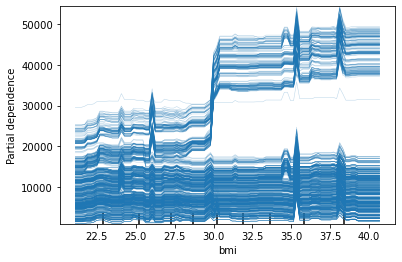

In [29]:
# partial dependence for a single column w/ ice lines
plot_partial_dependence(pipe[1], X_train, ['bmi'], kind='individual');

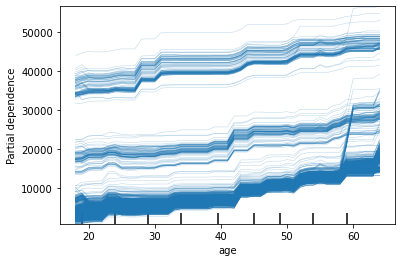

In [30]:
# partial dependence for a single column w/ ice lines
plot_partial_dependence(pipe[1], X_train, ['age'], kind='individual');

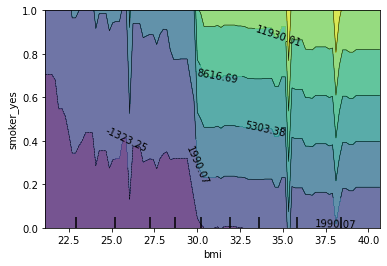

In [31]:
# and for interactions -- between BMI and smoking
plot_partial_dependence(pipe[1], X_train, [('bmi', 'smoker_yes')]);

In [32]:
## When I initially built and was tinkering with my models I split the test set into the last 70 records for each region
## This brought me to roughly an 80-20 split between the test and training sets
## I know there is a way to create an exact 80-20 split, which is defined right above the visuals
## Going to visualize that model now

In [35]:
tree3 = DecisionTreeRegressor(max_depth = 5)
ohe = ce.OneHotEncoder()
X  = ohe.fit_transform(X)
tree3.fit(X, y)
tree3.score(X, y)

0.8804085781738352

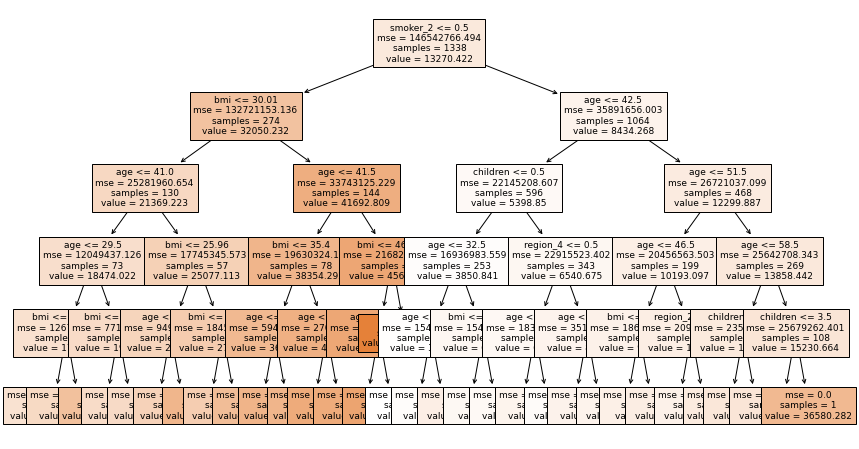

In [38]:
plt.figure(figsize = (14, 8))

plot_tree(tree3, fontsize = 9, filled = True, feature_names = X.columns);

In [39]:
feats = pd.DataFrame({
    'Columns': X.columns,
    'Importance': tree3.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

feats

,Columns,Importance
6,smoker_2,0.703951
3,bmi,0.171729
0,age,0.112759
4,children,0.009554
10,region_4,0.001634
8,region_2,0.000372
1,sex_1,0.000000
2,sex_2,0.000000
5,smoker_1,0.000000
7,region_1,0.000000
